# Classification for Data Exploration -- Decision Trees

Before we start, we need to install a couple of things (in this order), which will make it possible to visualize decision trees. 

### Anaconda Environment check

Make sure your Anaconda environment has : **pydotplus**  and **graphviz**

If the Anaconda doesn't have **pydotplus**, you can use the following command to install it into Anaconda.  Anaconda -> Environments -> base(root) -> Open Terminal:

**conda install -c conda-forge pydotplus**

**conda install -c conda-forge graphviz**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [2]:
import warnings
#suppress all future warning
warnings.filterwarnings('ignore')

Data from here <href>https://www.kaggle.com/uciml/adult-census-income</href>

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Let's try to train a decision tree to predict income

In [5]:
# The hyperparameter max_depth controls the overall complexity of a decision tree.
# Let’s build a shallow tree with max_depth=2 for better interpretation
dt = tree.DecisionTreeClassifier(max_depth=2)

In [6]:
# check dt type
type(dt)

sklearn.tree._classes.DecisionTreeClassifier

### Two problems with this data

<ol>
<li>We have null values
<li>We need numbers only
</ol>

## Cleaning the data set

In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


replace ? with NaN

In [8]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [9]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
# pove that there is no '?'
sum(df.workclass=='?')

0

remove education (we already have education.num)

In [11]:
# Drop education column permanently
df.drop(columns=['education'],inplace=True)

In [12]:
# Drop fnlwgt column permanently
df.drop(columns=['fnlwgt'],inplace=True)

In [13]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [14]:
# check the unique values in native.country columns
df['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [15]:
# check the number of unique values in native.country columns
df['native.country'].nunique()

41

Check how many unique patterns in each columns.

In [16]:
# Use a for loop tp show the number of unique values in each column
for c in df.columns:
    print(c + ' ' + str(df[c].nunique()) )

age 73
workclass 8
education.num 16
marital.status 7
occupation 14
relationship 6
race 5
sex 2
capital.gain 119
capital.loss 92
hours.per.week 94
native.country 41
income 2


make dummy variables for all categorical variables except income

In [17]:
df.shape

(32561, 13)

In [18]:
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [19]:
# Use get_dummies to create dummy variables for all categorical columns
# For each categorical column, treat nan as a category and generate nan dummy variable
df = pd.get_dummies(df, columns=['workclass','marital.status',
        'occupation','relationship','race','sex','native.country'],
        dummy_na=True)

In [20]:
df.shape

(32561, 96)

In [21]:
df

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan
0,90,9,0,4356,40,<=50K,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,82,9,0,4356,18,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,66,10,0,4356,40,<=50K,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,54,4,0,3900,40,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,41,10,0,3900,40,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32557,27,12,0,0,38,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32558,40,9,0,0,40,>50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32559,58,9,0,0,40,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [22]:
# chech the unique values in our outcome
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [23]:
df

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan
0,90,9,0,4356,40,<=50K,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,82,9,0,4356,18,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,66,10,0,4356,40,<=50K,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,54,4,0,3900,40,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,41,10,0,3900,40,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32557,27,12,0,0,38,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32558,40,9,0,0,40,>50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32559,58,9,0,0,40,<=50K,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


Make income binary

In [24]:
# make a copy of df
df2=df.copy()

In [25]:
# write a lambda function and use startswith function to convert >50K to 1.0 and <=50K to 0.0
df2['income1'] = df2.income.apply(lambda x: 1.0 if x.startswith('>') else 0.0)

In [26]:
df2

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan,income1
0,90,9,0,4356,40,<=50K,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.0
1,82,9,0,4356,18,<=50K,False,False,False,True,...,False,False,False,False,False,True,False,False,False,0.0
2,66,10,0,4356,40,<=50K,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.0
3,54,4,0,3900,40,<=50K,False,False,False,True,...,False,False,False,False,False,True,False,False,False,0.0
4,41,10,0,3900,40,<=50K,False,False,False,True,...,False,False,False,False,False,True,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,<=50K,False,False,False,True,...,False,False,False,False,False,True,False,False,False,0.0
32557,27,12,0,0,38,<=50K,False,False,False,True,...,False,False,False,False,False,True,False,False,False,0.0
32558,40,9,0,0,40,>50K,False,False,False,True,...,False,False,False,False,False,True,False,False,False,1.0
32559,58,9,0,0,40,<=50K,False,False,False,True,...,False,False,False,False,False,True,False,False,False,0.0


In [27]:
# Use replace function to replace'<=50K' with 0.0 and '>50K' with 1.0
df2['income2'] = df.income.replace({'<=50K':0.0, '>50K':1.0})

In [28]:
df2.head(10)

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan,income1,income2
0,90,9,0,4356,40,<=50K,False,False,False,False,...,False,False,False,False,True,False,False,False,0.0,0.0
1,82,9,0,4356,18,<=50K,False,False,False,True,...,False,False,False,False,True,False,False,False,0.0,0.0
2,66,10,0,4356,40,<=50K,False,False,False,False,...,False,False,False,False,True,False,False,False,0.0,0.0
3,54,4,0,3900,40,<=50K,False,False,False,True,...,False,False,False,False,True,False,False,False,0.0,0.0
4,41,10,0,3900,40,<=50K,False,False,False,True,...,False,False,False,False,True,False,False,False,0.0,0.0
5,34,9,0,3770,45,<=50K,False,False,False,True,...,False,False,False,False,True,False,False,False,0.0,0.0
6,38,6,0,3770,40,<=50K,False,False,False,True,...,False,False,False,False,True,False,False,False,0.0,0.0
7,74,16,0,3683,20,>50K,False,False,False,False,...,False,False,False,False,True,False,False,False,1.0,1.0
8,68,9,0,3683,40,<=50K,True,False,False,False,...,False,False,False,False,True,False,False,False,0.0,0.0
9,41,10,0,3004,60,>50K,False,False,False,True,...,False,False,False,False,False,False,False,True,1.0,1.0


Need to remove duplicated columns

In [29]:
# drop 'income' and 'income2'
df2.drop(columns=(['income', 'income2']), inplace=True)

In [30]:
df2

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan,income1
0,90,9,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.0
1,82,9,0,4356,18,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0
2,66,10,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.0
3,54,4,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0
4,41,10,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0
32557,27,12,0,0,38,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0
32558,40,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,1.0
32559,58,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0


In [31]:
# rename 'income1' to 'income'
df2.rename(columns={'income1':'income'},inplace=True)

In [32]:
df2.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan,income
0,90,9,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.0
1,82,9,0,4356,18,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0
2,66,10,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.0
3,54,4,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0
4,41,10,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0


In [33]:
df=df2

In [34]:
df.shape

(32561, 96)

## Train the decision tree

Make X and Y. Remember to take out the dependent variable from X, or else the classification problem becomes trivial!

In [35]:
# drop outcome from X
X = df.drop(columns='income')

In [36]:
X

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan
0,90,9,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,82,9,0,4356,18,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,66,10,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,54,4,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,41,10,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32557,27,12,0,0,38,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32558,40,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32559,58,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [37]:
# income column as Y
Y = df.income

In [38]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    0.0
32558    1.0
32559    0.0
32560    0.0
Name: income, Length: 32561, dtype: float64

Build the tree

In [39]:
# train the decision tree classifier
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

Visualize the tree

In [40]:
len(df)

32561

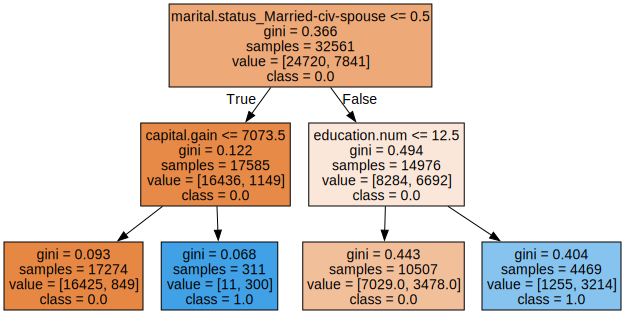

In [41]:
import graphviz
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
dot_data =tree.export_graphviz(dt, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)  
graph = graphviz.Source(dot_data) 
graph

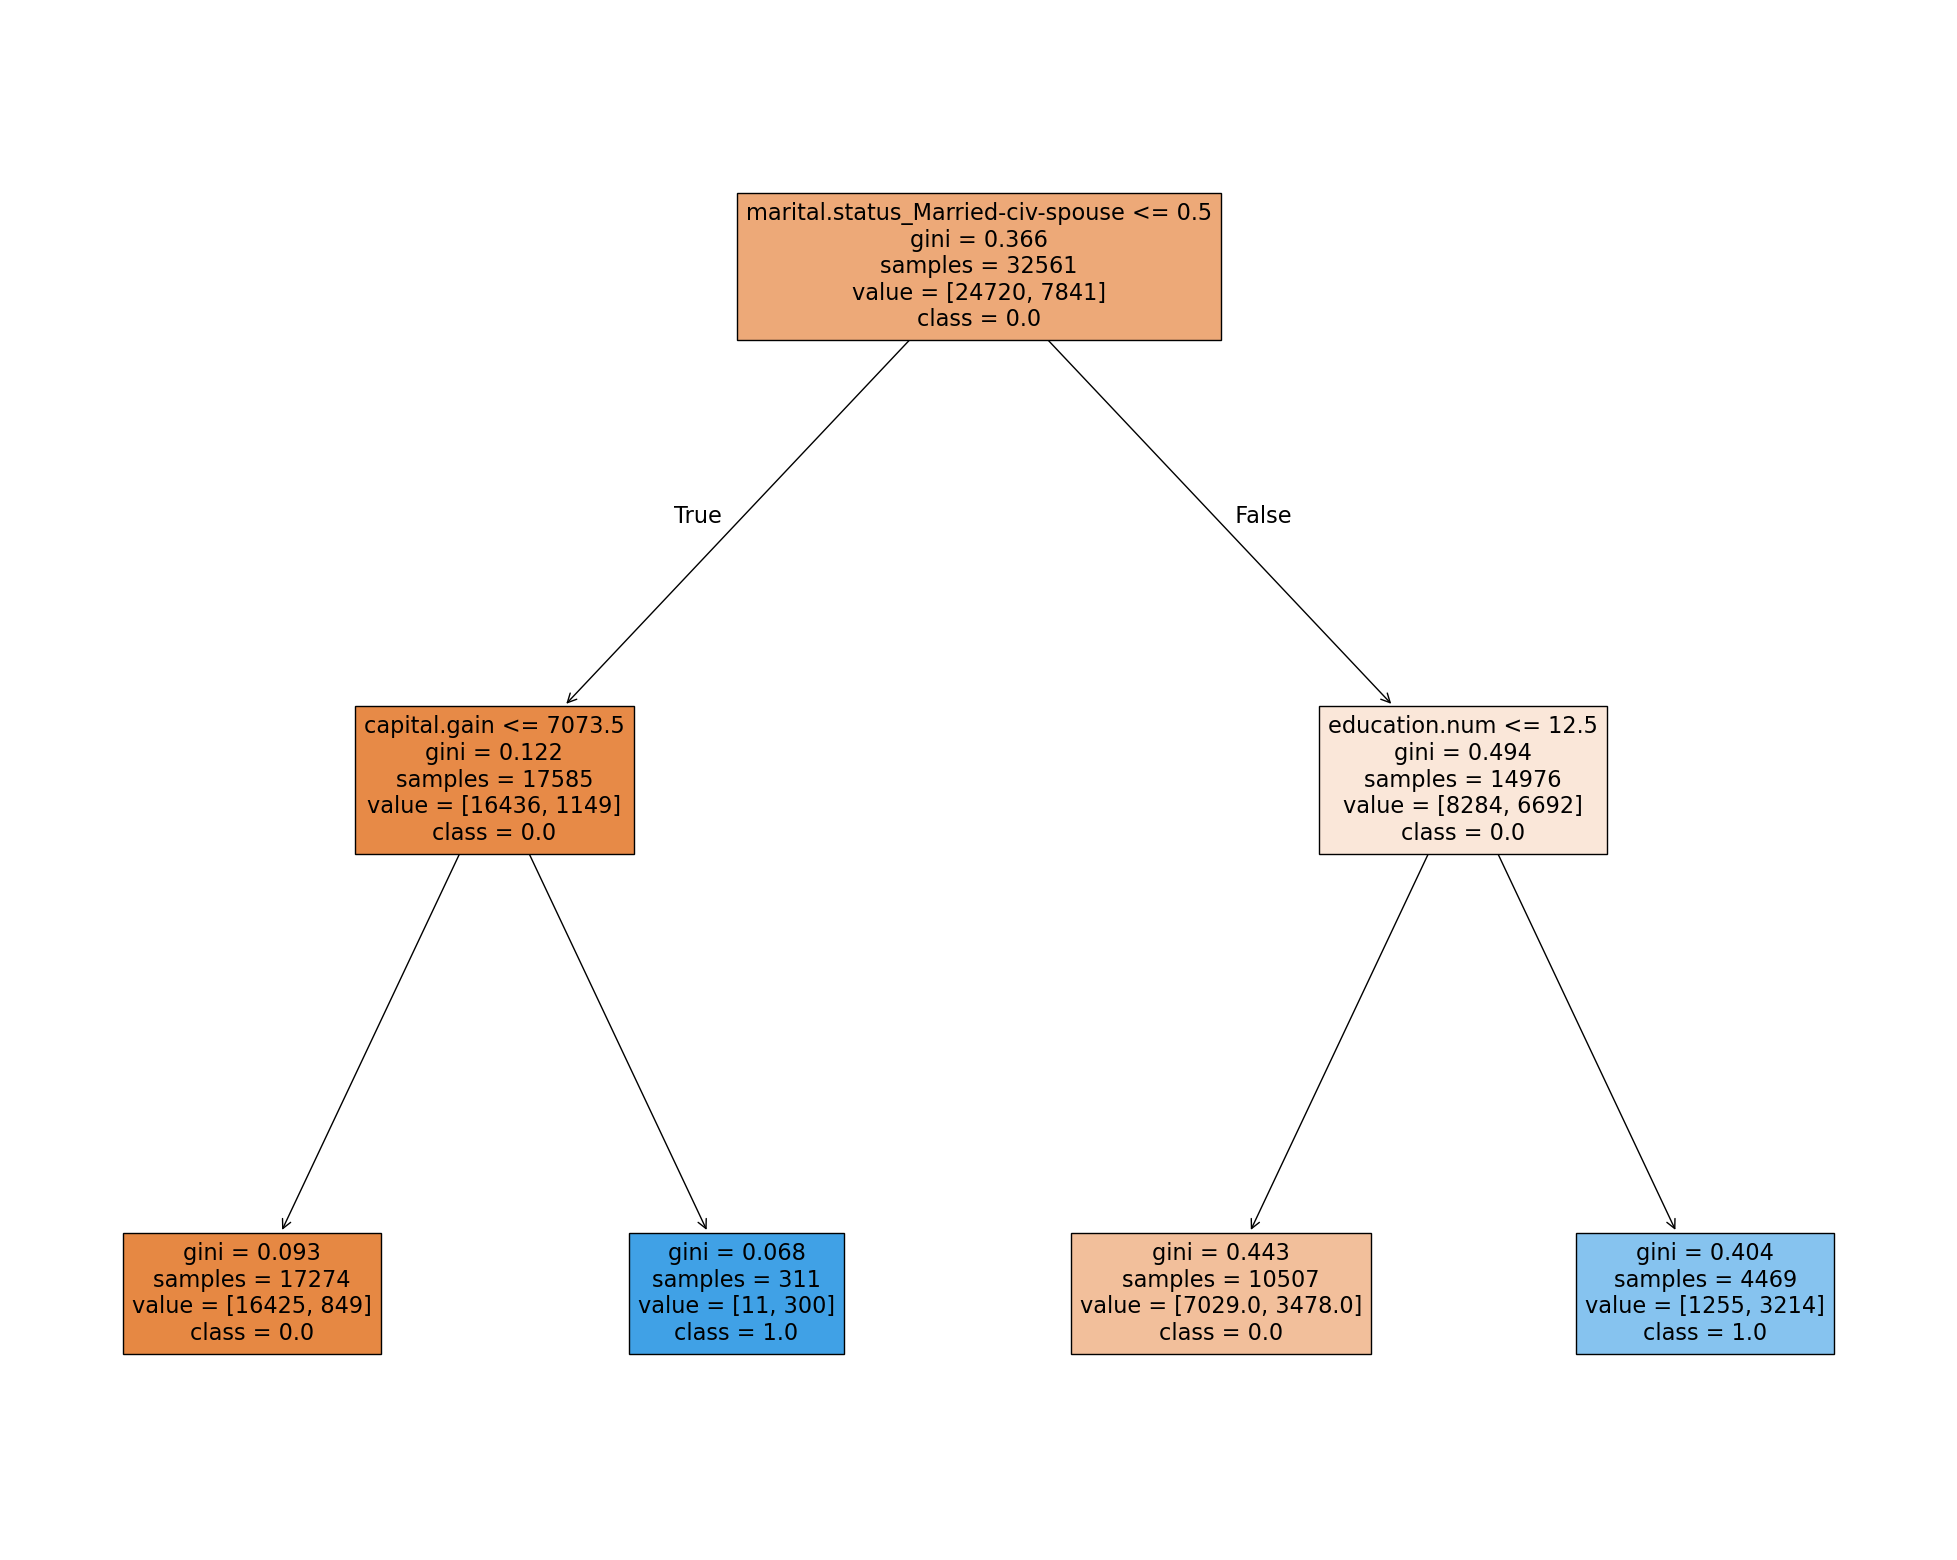

In [42]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt,
           feature_names = dt_feature_names, 
           class_names=dt_target_names,
           filled = True)
plt.show()

### Note 1: 
For **Mac OS** users who experience issue installing graphviz, please try the following steps:  (First check your MacOS version. If it is still 10.x, pls update the MacOS to 11.x)

1. Go to this website: https://brew.sh 
2. Once you launch the website, you will see a line of code under **Install Homebrew**
3. Copy the code <i>**/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"**</i>
to your computer’s terminal (NOT the terminal launched through Anaconda) and run it
4. After installing Homebrew successfully, run the code <i>**brew install graphviz**</i> to your computer’s terminal
5. Restart computer and if installation in step 4 does not work 

If restarting the computer in step 5 does not help installing graphviz, please try the below steps:

6. Go to computer’s terminal and run the code <i>**brew uninstall graphviz**</i>
7. Use the following command to install it into Anaconda: 
Open Anaconda -> Environments -> Base(root) -> Open Terminal -> run the following code: <i>**pip install graphviz**</i>
8. Restart computer and if installation in step 7 does not work


- If restarting the computer in step 8 does not help installing graphviz, please contact TA. 

Note: 
- For MacOS 10.15.6+, the error "GraphViz's executables not found" can be solved by installing brew (steps 1-5)
- MacOS Catalina (10.15.6) users need to take steps 6-8 after trying steps 1-5
- MacOS version 10.13 is too old for direct brew installation and has to update ios before any step is taken.

### Note 2:

For **Microsoft Windows OS**, if you see error **'GraphViz's executables not found.'** You need to first figure out the ACTUAL_DIRECTORY where the graphviz package being installed to in your C drive. Then do one of the following:

1. Modify the Windows system PATH environment, add in the ACTUAL_DIRECTORY (for example: C:\Users\ttan\Anaconda3\Library\bin\graphviz\bin) then restart the Windows. 

Detail example in here : https://geek-university.com/python/add-python-to-the-windows-path/ or https://www.youtube.com/watch?v=q7PzqbKUm_4

Or...

2. Add the following two lines at the beginning of this code section.

<i>**import os**</i>

<i>**os.environ["PATH"] += os.pathsep + ACTUAL_DIRECTORY**</i>

for example : <i>**os.environ["PATH"] += os.pathsep + C:\Users\ttan\Anaconda3\Library\bin\graphviz\bin**</i>

**Note to user name with a space:**

The above workaround may not work for you.  Here are some extra steps you need to do:
* uninstall the graphviz package from Anaconda by <i>**conda remove graphviz**</i> from the cmd line.
* reinstall the pydotplus with <i>**conda install pydotplus**</i>
* manually install the graphviz package with the .msi file through here https://graphviz.gitlab.io/download/ Use the Windows host, stable version. (for example, graphviz-2.38.msi )
* When executing the .msi file, specify a directory that is NOT under your user name (example: c:\graphviz )
* After installation completed, modify/add your Windows PATH env. variable to the newly installed graphviz directory. (see above example Youtube video)
* restart Anaconda, now your graphviz search path issue should be resolved.


## Validating the finding

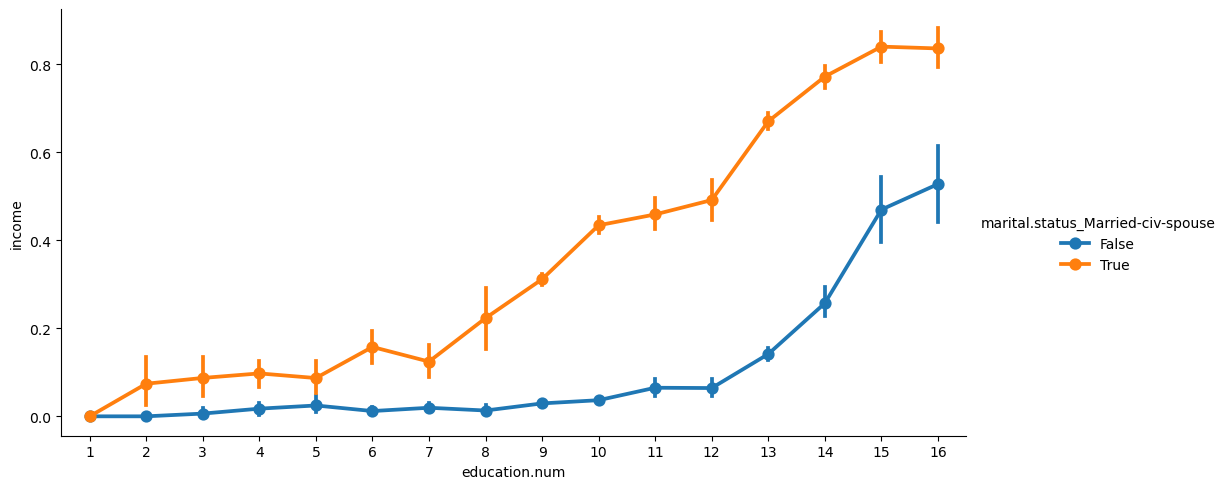

In [43]:
sns.catplot(x='education.num', y='income', hue='marital.status_Married-civ-spouse', kind='point', data=df, aspect=2)

Education.num = 12.5 is a good threshold to separate low income from high income, but it is more effective for those married civilly (right part of the tree)


In [44]:
df2 = df.copy()

In [45]:
df2['capital.gain'].value_counts().sort_index(ascending=False)

capital.gain
99999      159
41310        2
34095        5
27828       34
25236       11
         ...  
914          8
594         34
401          2
114          6
0        29849
Name: count, Length: 119, dtype: int64

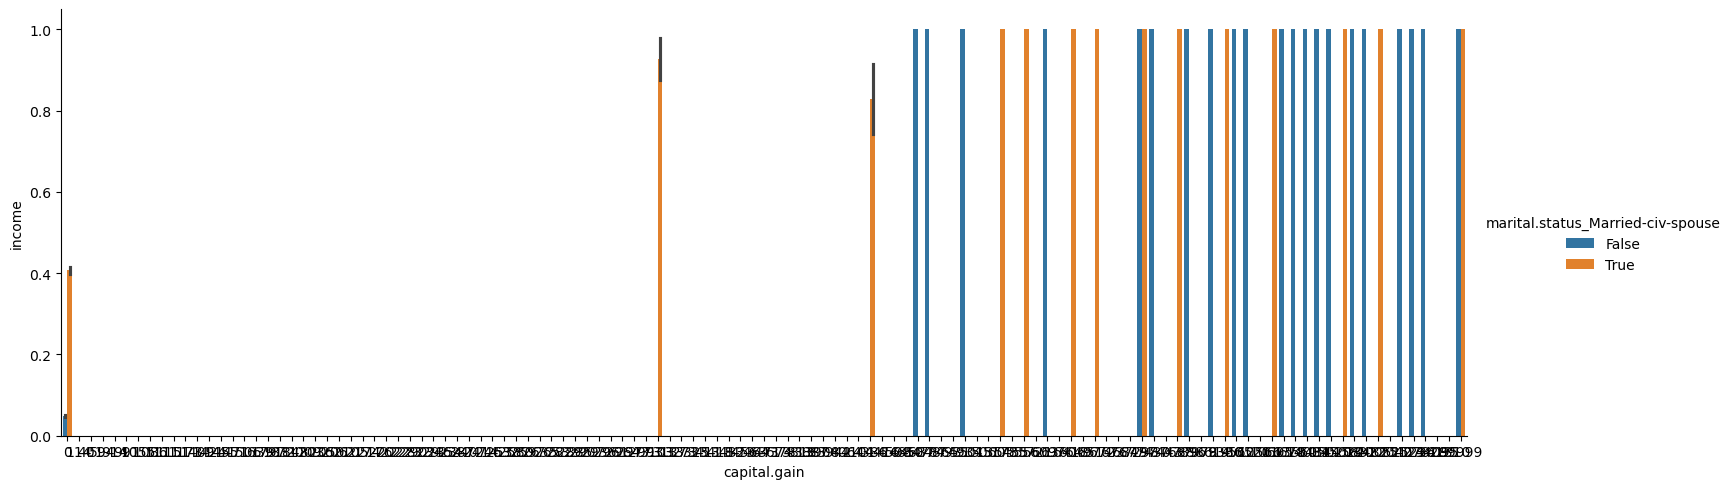

In [46]:
sns.catplot(x='capital.gain',y='income',data=df2,aspect=3,kind='bar', hue='marital.status_Married-civ-spouse')

In [47]:
df2['binned_capital_gain'] = pd.cut(df2['capital.gain'],bins=[0,7073,100000], include_lowest=True)

In [48]:
df2

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan,income,binned_capital_gain
0,90,9,0,4356,40,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0.0,"(-0.001, 7073.0]"
1,82,9,0,4356,18,False,False,False,True,False,...,False,False,False,False,True,False,False,False,0.0,"(-0.001, 7073.0]"
2,66,10,0,4356,40,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0.0,"(-0.001, 7073.0]"
3,54,4,0,3900,40,False,False,False,True,False,...,False,False,False,False,True,False,False,False,0.0,"(-0.001, 7073.0]"
4,41,10,0,3900,40,False,False,False,True,False,...,False,False,False,False,True,False,False,False,0.0,"(-0.001, 7073.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,False,False,False,True,False,...,False,False,False,False,True,False,False,False,0.0,"(-0.001, 7073.0]"
32557,27,12,0,0,38,False,False,False,True,False,...,False,False,False,False,True,False,False,False,0.0,"(-0.001, 7073.0]"
32558,40,9,0,0,40,False,False,False,True,False,...,False,False,False,False,True,False,False,False,1.0,"(-0.001, 7073.0]"
32559,58,9,0,0,40,False,False,False,True,False,...,False,False,False,False,True,False,False,False,0.0,"(-0.001, 7073.0]"


(0, 7073]
(7073, 100000]

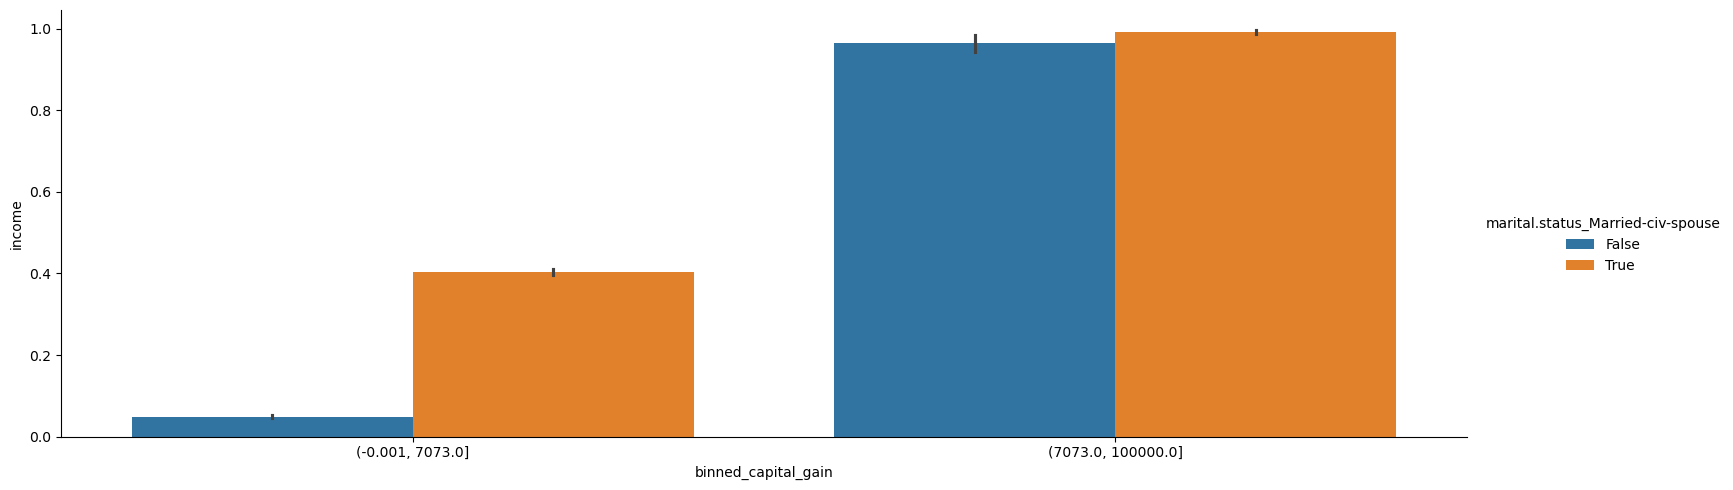

In [49]:
sns.catplot(x='binned_capital_gain',y='income',data=df2, aspect=3,kind='bar', hue='marital.status_Married-civ-spouse')

Capital.gain = 7073 is a good threshold to separate low income from high income, but it is more effective for those NOT married civilly (left part of the tree)
